<a href="https://colab.research.google.com/github/poonmanz/portfolio/blob/main/KNNDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import random

In [ ]:
# upload data set
uploaded = files.upload()

In [ ]:
# import data set
df = pd.read_csv("diabetes.csv")

In [ ]:
print(df.head())
print(df.shape)

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
(768, 9)


In [ ]:
# Clean data set
x = df.drop("Outcome", axis = 1).values # X เก็บข้อมูลตัวเลขตัด หัว column ออก (2D) และตัดผลเฉลยออก
y = df['Outcome'].values # y เก็บผลเฉลย

In [ ]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4) # train 60 test 40

68.83116883116884
68.18181818181817
69.8051948051948
68.5064935064935
69.8051948051948
70.12987012987013
73.05194805194806
72.07792207792207


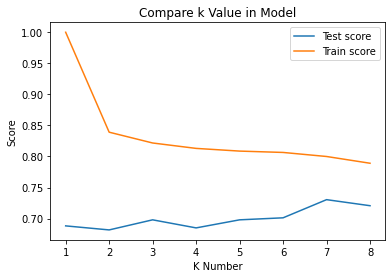

In [ ]:
# find k to model (ทำ loop k เพื่อหาค่า k ที่เหมาะสมที่สุด) วนลูป k = 1,2,3,4,5,6,7,8
k_neighbors = np.arange(1, 9)
random.seed(42)

train_score = np.empty(len(k_neighbors)) #สร้าง array เปล่าๆไว้เก็บค่าที่วนลูปออกมาได้
test_score = np.empty(len(k_neighbors)) #สร้าง array เปล่าๆไว้เก็บค่าที่วนลูปออกมาได้

for i,k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    # วัดประสิทธิภาพ
    train_score[i] = knn.score(x_train, y_train)
    test_score[i] = knn.score(x_test, y_test)

    print(test_score[i]*100)

plt.title("Compare k Value in Model")
plt.plot(k_neighbors, test_score, label = "Test score")
plt.plot(k_neighbors, train_score, label = "Train score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

# k = 7 ได้ประสิทธิภาพที่ดีที่สุด

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
# train
knn.fit(x_train, y_train)

# prediction
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       186
           1       0.68      0.60      0.64       122

    accuracy                           0.73       308
   macro avg       0.72      0.71      0.71       308
weighted avg       0.73      0.73      0.73       308



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predict'], margins = True))

Predict    0    1  All
Actual                
0        152   34  186
1         49   73  122
All      201  107  308
